In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

print("Data Preparation completed!")


Data Preparation completed!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.utils import class_weight

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# Calculate class weights to address potential class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels.argmax(axis=1)), y=train_labels.argmax(axis=1))
class_weights = dict(enumerate(class_weights))

print("Data Preparation completed!")


Data Preparation completed!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import losses
# Assuming these are the image dimensions
IMG_ROWS, IMG_COLS = 28, 28
NUM_CLASSES = 10 # Number of classes in Fashion MNIST

model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=losses.categorical_crossentropy, # Use losses instead of keras.losses
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

print("Model Visualization completed and saved as 'fashion_mnist_model.png'!")


Model Visualization completed and saved as 'fashion_mnist_model.png'!


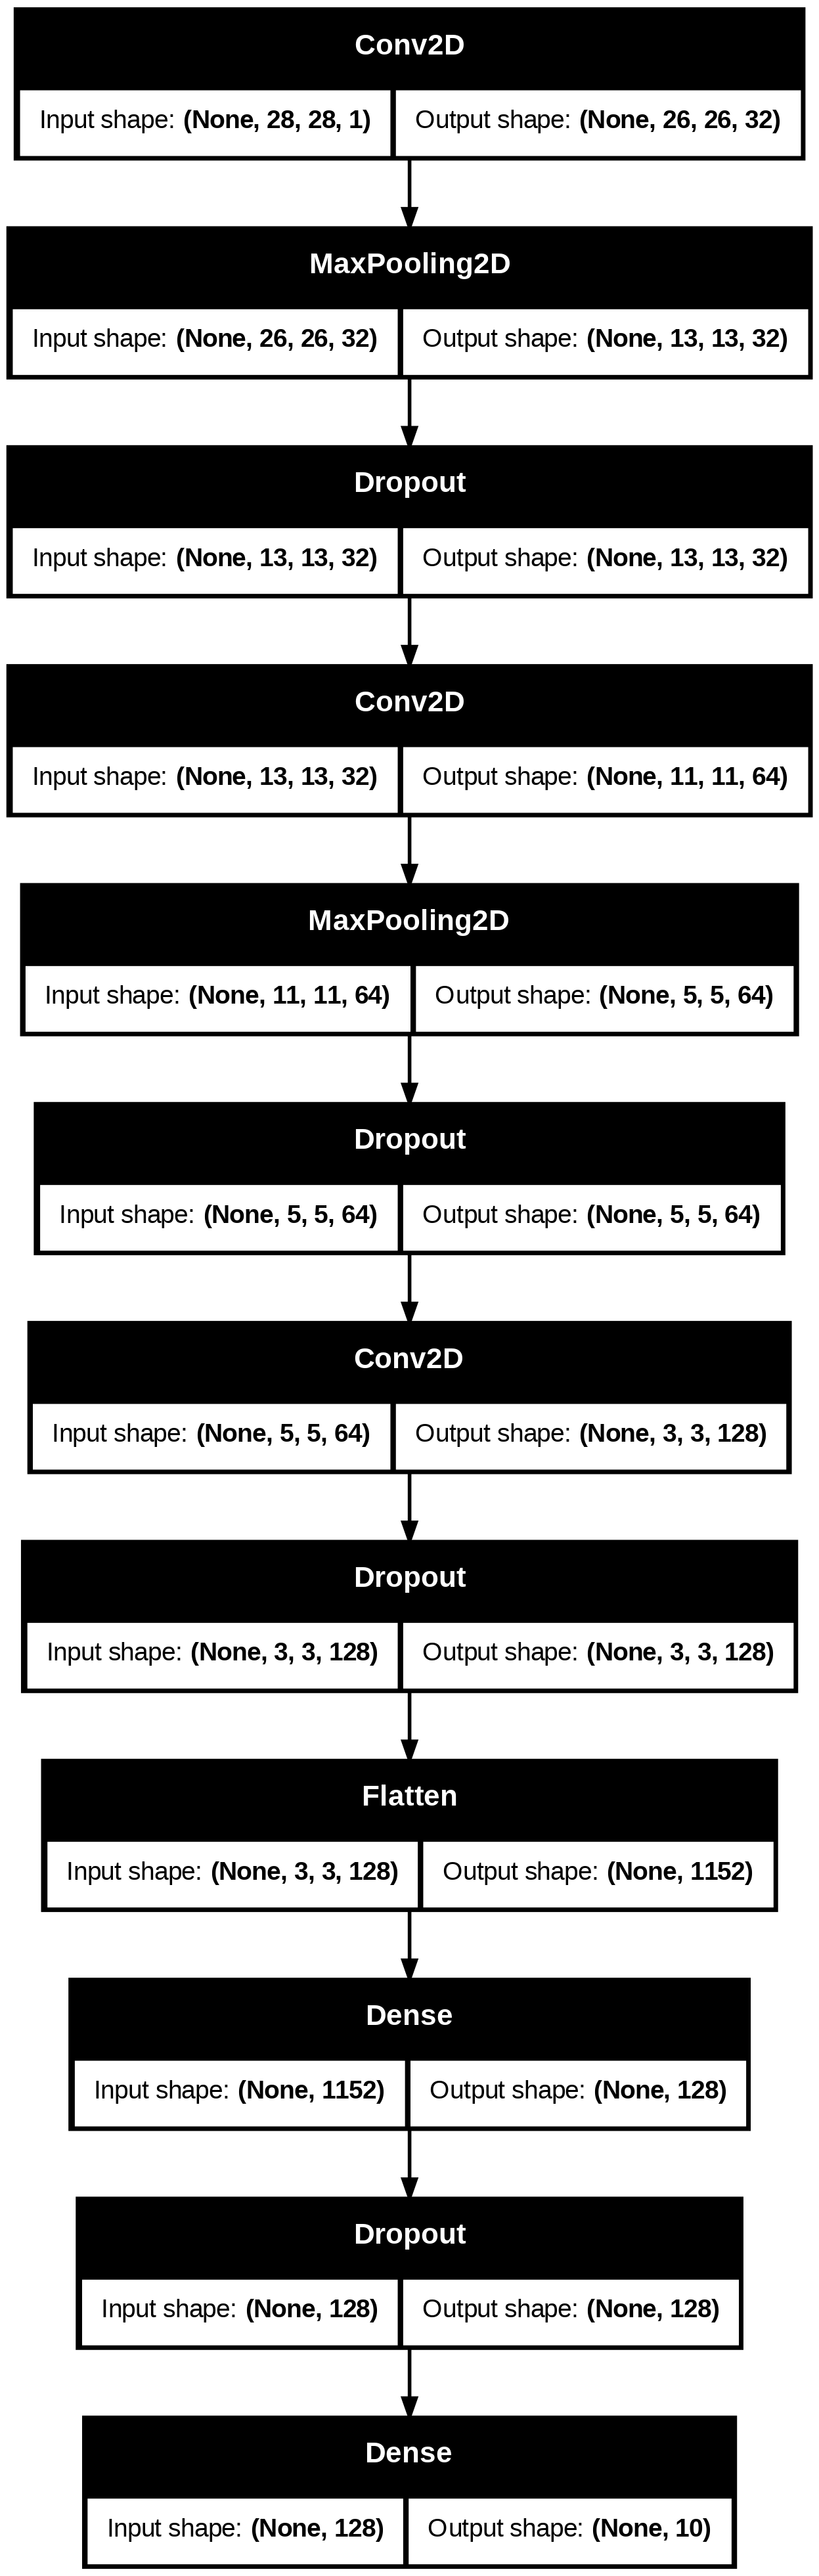

In [ ]:
from IPython.display import Image
Image('fashion_mnist_model.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights,
                    callbacks=[early_stopping])

print("Model Training completed!")

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6746 - loss: 0.8784 - val_accuracy: 0.8618 - val_loss: 0.3733
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.8457 - loss: 0.4222 - val_accuracy: 0.8805 - val_loss: 0.3247
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.8687 - loss: 0.3579 - val_accuracy: 0.8894 - val_loss: 0.2915
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.8763 - loss: 0.3389 - val_accuracy: 0.8992 - val_loss: 0.2730
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.8812 - loss: 0.3187 - val_accuracy: 0.9005 - val_loss: 0.2660
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.8892 - loss: 0.2996 - val_accuracy: 0.9010 - val_loss: 0.2691
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.8940 - loss: 0.2911 - val_accuracy: 0.9009 - val_loss: 0.2632
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8956 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9077 - loss: 0.2636

Test accuracy: 0.9076


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


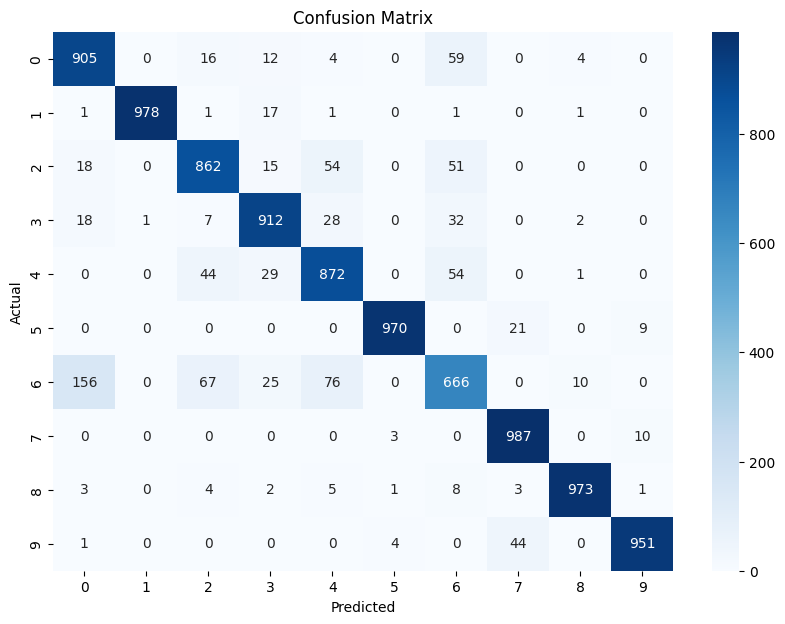

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.90      0.91      0.91      1000
           4       0.84      0.87      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.67      0.71      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# Generate predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

from sklearn.metrics import confusion_matrix, classification_report # Import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


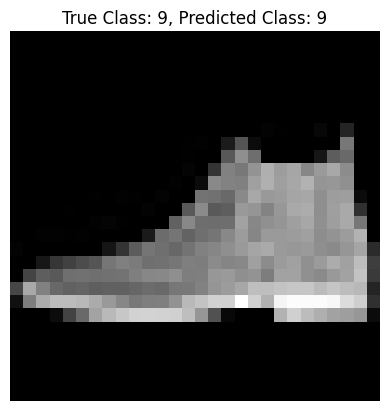

In [ ]:
# Show sample predictions for a single input image
sample_index = 0  # Change this index to see predictions for different images
sample_image = test_images[sample_index]
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Predict the class
predicted_class = np.argmax(model.predict(sample_image), axis=1)
true_class = y_true_classes[sample_index]

# Display the image and prediction
plt.imshow(test_images[sample_index], cmap='gray')
plt.title(f'True Class: {true_class}, Predicted Class: {predicted_class[0]}')
plt.axis('off')
plt.show()


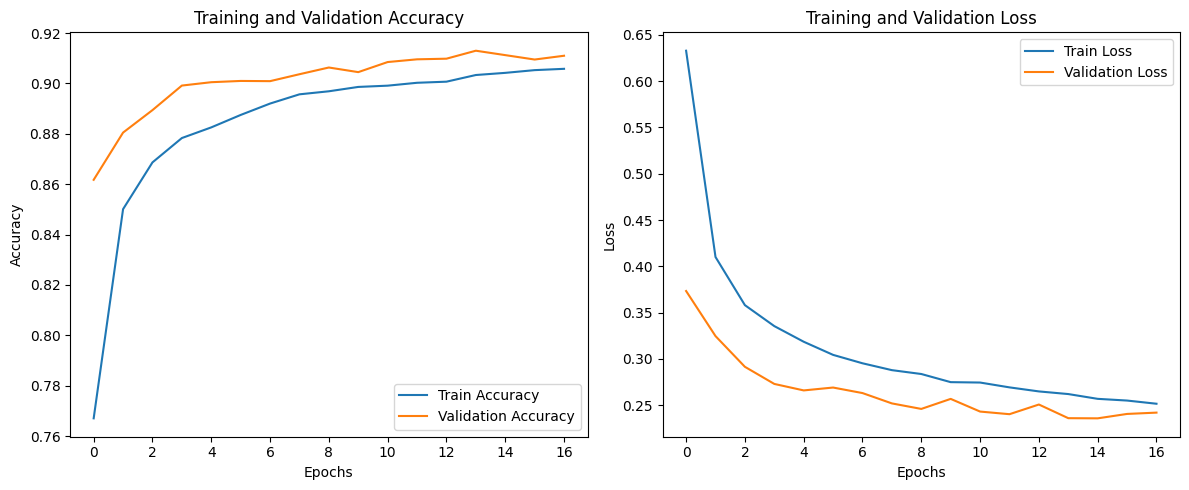

Plots for training and validation metrics completed!


In [ ]:
# Plotting training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Plots for training and validation metrics completed!")


In [ ]:
# Save the model
model.save('fashion_mnist_model.h5')
print("Model saved as 'fashion_mnist_model.h5'")


Model saved as 'fashion_mnist_model.h5'


Enter an index between 0 and 9999 to predict its class: 8902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


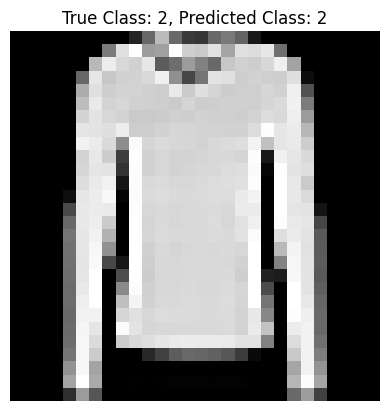

In [ ]:
# Function to predict a class for a given image index
def predict_class(image_index):
    # Show sample predictions for the given index
    sample_image = test_images[image_index]
    sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

    # Predict the class
    predicted_class = np.argmax(model.predict(sample_image), axis=1)[0]
    true_class = y_true_classes[image_index]

    # Display the image and prediction
    plt.imshow(test_images[image_index], cmap='gray')
    plt.title(f'True Class: {true_class}, Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

# Taking user input for prediction
try:
    user_index = int(input(f"Enter an index between 0 and {len(test_images) - 1} to predict its class: "))
    if 0 <= user_index < len(test_images):
        predict_class(user_index)
    else:
        print("Index out of range. Please enter a valid index.")
except ValueError:
    print("Invalid input. Please enter a numeric index.")
